In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Get the data

In [2]:
df = pd.read_csv('../large_data/mnist/train.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x = df.drop('label', axis=1).values / 255.  # bring pixel values within [0, 1] range
y = df.label.values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
print(f"x_train: {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")

/Users/sasha/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_train: (33600, 784)
x_test : (8400, 784)
y_train: (33600,)
y_test : (8400,)


In [ ]:
# Function to plot images
def plot_img(x):
  plt.imshow(x.reshape(np.sqrt(len(x))), cmap="gray")

# Train an SVC

In [4]:
model = SVC()

t0 = datetime.now()
model.fit(x_train, y_train)
print(f"Training time: {datetime.now() - t0}")

/Users/sasha/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training time: 0:03:54.772982


In [21]:
t0 = datetime.now()
score_train = model.score(x_train, y_train)
print(f"Train score: {score_train:.2f} [{datetime.now() - t0}]")

Train score: 0.94 [0:05:59.276127]


In [18]:
t0 = datetime.now()
p_test = model.predict(x_test)
score_test = accuracy_score(y_test, p_test)
print(f"Test score: {score_test:.2f}, [{datetime.now() - t0}]")

Train score: 0.94, [0:01:30.765031]


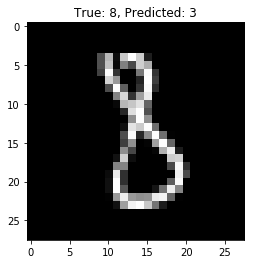

Continue? (Y/n): Y


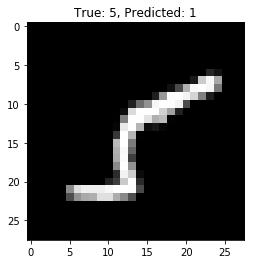

Continue? (Y/n): Y


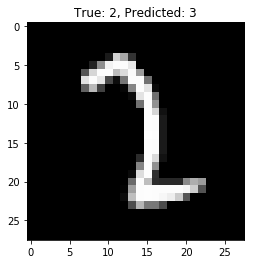

Continue? (Y/n): n


In [17]:
missclassified = np.where(p_test != y_test)[0]
width = np.sqrt(x_test.shape[1]).astype(int)
for i in missclassified:
  plt.imshow(x_test[i].reshape((width, width)), cmap="gray")
  plt.title(f"True: {y_test[i]}, Predicted: {p_test[i]}")
  plt.show()
  if input("Continue? (Y/n): ") == "n": break